In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error


Importando e Tratando Dados - Consumo global por continente/bloco econômico

In [ ]:
CT= pd.read_csv('/content/Continent_Consumption_TWH.csv')

In [ ]:
y=CT.iloc[:,1]
y

0     101855.54
1     102483.56
2     102588.23
3     103646.56
4     104449.03
5     107112.30
6     109763.94
7     110903.68
8     111450.29
9     113974.00
10    116590.75
11    117521.15
12    120207.68
13    124464.26
14    129953.62
15    133582.18
16    137396.82
17    141211.46
18    142874.55
19    141490.58
20    149294.31
21    151783.13
22    153748.60
23    155958.30
24    157667.91
25    158086.59
26    159377.52
27    162459.47
28    166297.37
29    167553.41
30    160819.64
Name: World, dtype: float64

In [ ]:
x=CT.iloc[:,2:12]
x

,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
5,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
6,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
7,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
8,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99
9,60301.55,28319.05,21306.16,28528.39,6989.63,32412.81,1477.01,5559.14,4244.95,10373.96


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=13)

In [ ]:
models={
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K Neighbors": KNeighborsRegressor(),
    "Linearr Rregression": LinearRegression(),
    "SVM": SVR(),
}


Decision Tree:
0.96
R2:(0.9601857989636734,)
Mean Absolute Error:(3345.951000000001,)
Mean Squared Error:(18477864.40538999,)
Max Error:8710.869999999995
Ypred:[137396.82 149294.31 158086.59 102588.23 109763.94 129953.62 158086.59
 109763.94 153748.6  157667.91]



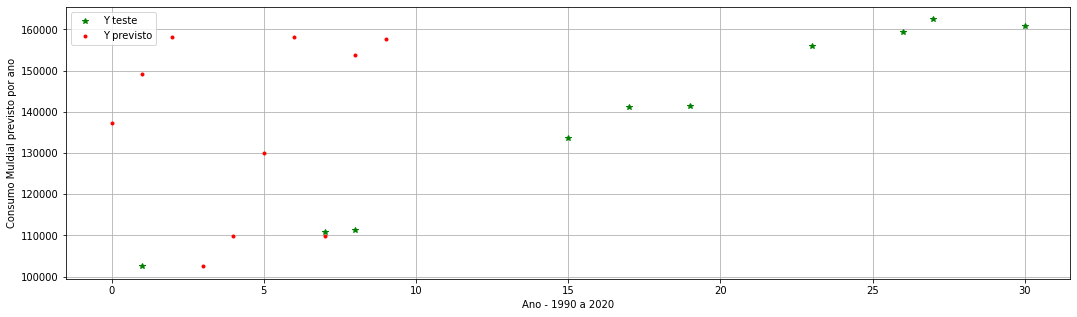

Random Forest:
0.99
R2:(0.9867356971668327,)
Mean Absolute Error:(1549.174150000028,)
Mean Squared Error:(6155994.162978904,)
Max Error:6795.409000000072
Ypred:[141137.8421 148285.989  155847.4661 102592.3005 111206.1763 130947.8687
 158359.1972 113573.5791 161104.4587 159849.9306]



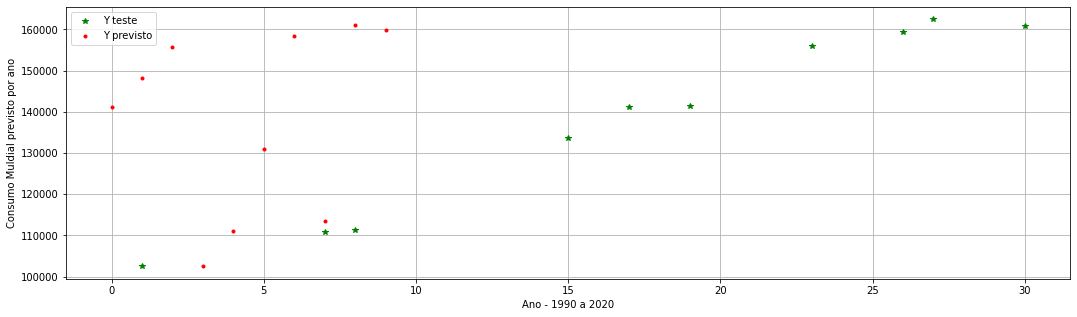

K Neighbors:
0.99
R2:(0.9876415642363381,)
Mean Absolute Error:(1989.893000000005,)
Mean Squared Error:(5735579.124024429,)
Max Error:5528.902000000002
Ypred:[142260.486 147019.482 154116.108 103930.332 112992.428 130979.386
 157516.72  112992.428 160670.776 160670.776]



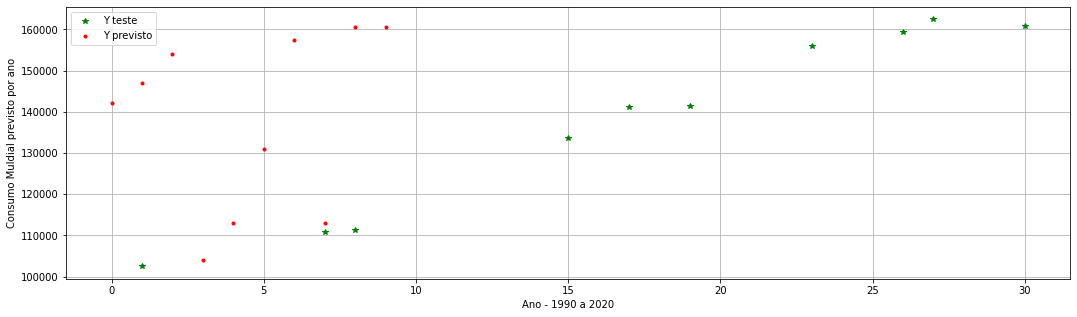

Linearr Rregression:
1.00
R2:(0.9998029613143061,)
Mean Absolute Error:(207.97188540764765,)
Mean Squared Error:(91446.11776955119,)
Max Error:774.2822479543975
Ypred:[141263.73103921 141427.00966859 156047.53480636 102439.1780557
 110810.02764214 133651.5174634  159015.40431148 111264.29797206
 162114.58905289 161593.92224795]



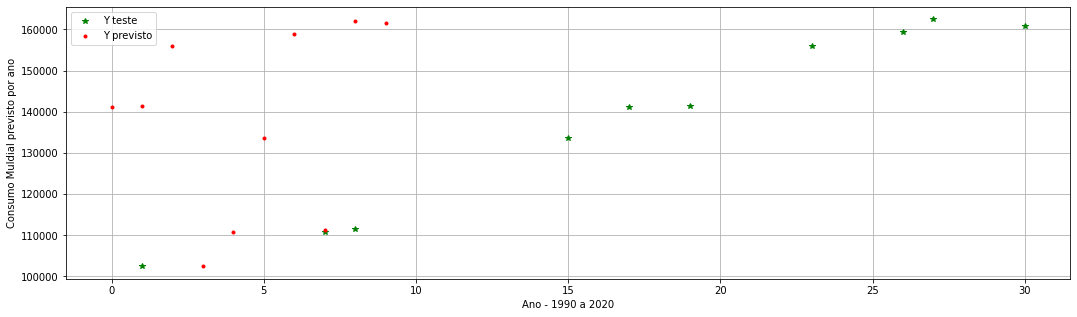

SVM:
-0.39
R2:(-0.3928405148557852,)
Mean Absolute Error:(23217.20638641459,)
Mean Squared Error:(646420561.0544971,)
Max Error:37989.8054255459
Ypred:[124466.622225   124467.26875541 124469.13124083 124462.16637159
 124462.90578806 124465.48785324 124469.43307768 124462.91381335
 124469.66457445 124469.93438225]



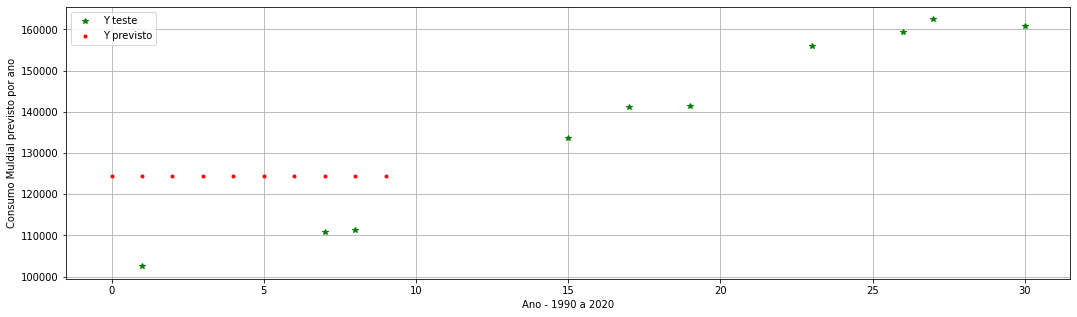

In [ ]:
for model_name, model_obj in models.items():
    model_obj.fit(x_train,y_train)
    ypred=model_obj.predict(x_test)
    score = model_obj.score(x_test,y_test) #r2_score

    r2s= r2_score(y_test,ypred),
    mae= mean_absolute_error(y_test,ypred),
    mse= mean_squared_error(y_test,ypred),
    me= max_error(y_test,ypred)

    print(f"{model_name}:\n{score:.02f}\nR2:{r2s}\nMean Absolute Error:{mae}\nMean Squared Error:{mse}\nMax Error:{me}\nYpred:{ypred}\n"),
    plt.figure(figsize=(18, 5))
    plt.plot(y_test, 'g*', label="Y teste")
    plt.plot(ypred, 'r.',label="Y previsto")
    plt.legend(loc=2)
    plt.xlabel('Ano - 1990 a 2020')
    plt.ylabel('Consumo Muldial previsto por ano')
    plt.grid(True)
    plt.show()

In [ ]:
    print(f"y_test=\n{y_test}")

y_test=
17    141211.46
19    141490.58
23    155958.30
1     102483.56
7     110903.68
15    133582.18
26    159377.52
8     111450.29
27    162459.47
30    160819.64
Name: World, dtype: float64


Importando e Tratando Dados - Consumo por países

In [ ]:
CY = pd.read_csv('/content/Country_Consumption_TWH.csv')

In [ ]:
CY=CY.T
CY

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
China,874.0,848.0,877.0,929.0,973.0,1045.0,1074.0,1073.0,1079.0,1099.0,...,2723.0,2821.0,2912.0,2966.0,2994.0,2977.0,3070.0,3201.0,3309.0,3381.0
United States,1910.0,1925.0,1964.0,1998.0,2036.0,2063.0,2108.0,2130.0,2148.0,2206.0,...,2191.0,2152.0,2190.0,2216.0,2192.0,2168.0,2161.0,2236.0,2214.0,2046.0
Brazil,141.0,143.0,145.0,148.0,156.0,162.0,170.0,179.0,183.0,187.0,...,271.0,282.0,294.0,303.0,297.0,287.0,292.0,288.0,293.0,286.0
Belgium,48.0,50.0,51.0,49.0,52.0,53.0,56.0,56.0,57.0,57.0,...,56.0,53.0,56.0,53.0,52.0,56.0,55.0,53.0,55.0,51.0
Czechia,50.0,45.0,44.0,43.0,41.0,42.0,43.0,43.0,42.0,39.0,...,43.0,43.0,43.0,42.0,42.0,41.0,43.0,43.0,43.0,39.0
France,225.0,237.0,234.0,238.0,231.0,240.0,251.0,244.0,252.0,252.0,...,258.0,258.0,259.0,249.0,253.0,248.0,247.0,246.0,243.0,217.0
Germany,351.0,344.0,338.0,335.0,333.0,336.0,348.0,345.0,343.0,335.0,...,313.0,315.0,322.0,307.0,309.0,310.0,311.0,302.0,294.0,275.0
Italy,147.0,150.0,149.0,149.0,147.0,159.0,159.0,162.0,166.0,169.0,...,168.0,162.0,156.0,147.0,153.0,151.0,154.0,151.0,149.0,137.0
Netherlands,67.0,69.0,69.0,70.0,70.0,73.0,77.0,75.0,75.0,74.0,...,77.0,77.0,75.0,71.0,72.0,74.0,74.0,73.0,72.0,70.0


In [ ]:
ycy=CY.iloc[:,30]
ycy

Year                    2020.0
China                   3381.0
United States           2046.0
Brazil                   286.0
Belgium                   51.0
Czechia                   39.0
France                   217.0
Germany                  275.0
Italy                    137.0
Netherlands               70.0
Poland                    97.0
Portugal                  20.0
Romania                   32.0
Spain                    107.0
Sweden                    47.0
United Kingdom           154.0
Norway                    27.0
Turkey                   141.0
Kazakhstan                70.0
Russia                   731.0
Ukraine                   86.0
Uzbekistan                44.0
Argentina                 72.0
Canada                   281.0
Chile                     38.0
Colombia                  39.0
Mexico                   151.0
Venezuela                 29.0
Indonesia                225.0
Japan                    386.0
Malaysia                  88.0
South Korea              283.0
Taiwan  

In [ ]:
xcy=CY.iloc[:,1:30]
xcy

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Year,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
China,848.0,877.0,929.0,973.0,1045.0,1074.0,1073.0,1079.0,1099.0,1130.0,...,2536.0,2723.0,2821.0,2912.0,2966.0,2994.0,2977.0,3070.0,3201.0,3309.0
United States,1925.0,1964.0,1998.0,2036.0,2063.0,2108.0,2130.0,2148.0,2206.0,2269.0,...,2217.0,2191.0,2152.0,2190.0,2216.0,2192.0,2168.0,2161.0,2236.0,2214.0
Brazil,143.0,145.0,148.0,156.0,162.0,170.0,179.0,183.0,187.0,188.0,...,267.0,271.0,282.0,294.0,303.0,297.0,287.0,292.0,288.0,293.0
Belgium,50.0,51.0,49.0,52.0,53.0,56.0,56.0,57.0,57.0,58.0,...,60.0,56.0,53.0,56.0,53.0,52.0,56.0,55.0,53.0,55.0
Czechia,45.0,44.0,43.0,41.0,42.0,43.0,43.0,42.0,39.0,41.0,...,45.0,43.0,43.0,43.0,42.0,42.0,41.0,43.0,43.0,43.0
France,237.0,234.0,238.0,231.0,240.0,251.0,244.0,252.0,252.0,255.0,...,263.0,258.0,258.0,259.0,249.0,253.0,248.0,247.0,246.0,243.0
Germany,344.0,338.0,335.0,333.0,336.0,348.0,345.0,343.0,335.0,337.0,...,330.0,313.0,315.0,322.0,307.0,309.0,310.0,311.0,302.0,294.0
Italy,150.0,149.0,149.0,147.0,159.0,159.0,162.0,166.0,169.0,172.0,...,174.0,168.0,162.0,156.0,147.0,153.0,151.0,154.0,151.0,149.0
Netherlands,69.0,69.0,70.0,70.0,73.0,77.0,75.0,75.0,74.0,75.0,...,83.0,77.0,77.0,75.0,71.0,72.0,74.0,74.0,73.0,72.0


In [ ]:
xcy_train, xcy_test, ycy_train, ycy_test=train_test_split(xcy,ycy,test_size=0.30,random_state=13)

In [ ]:
models={
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K Neighbors": KNeighborsRegressor(),
    "Linearr Rregression": LinearRegression(),
    "SVM": SVR(),
}

Decision Tree:
-3.54
R2:(-3.5396971879312558,)
Mean Absolute Error:(104.35714285714286,)
Mean Squared Error:(49142.5,)
Max Error:633.0
Ypred:[ 20. 209. 126. 151. 225. 908. 225.  81. 126. 126. 225.  44. 225. 908.]



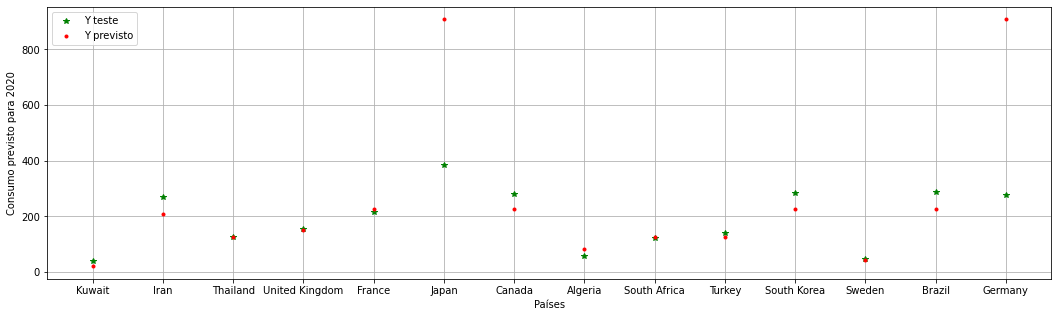

Random Forest:
0.37
R2:(0.3723651090251645,)
Mean Absolute Error:(53.65357142857143,)
Mean Squared Error:(6794.186121428572,)
Max Error:228.73000000000002
Ypred:[ 25.64 202.05 129.18 165.44 214.1  614.73 200.28  45.35 133.88 119.77
 201.3   44.16 200.28 404.85]



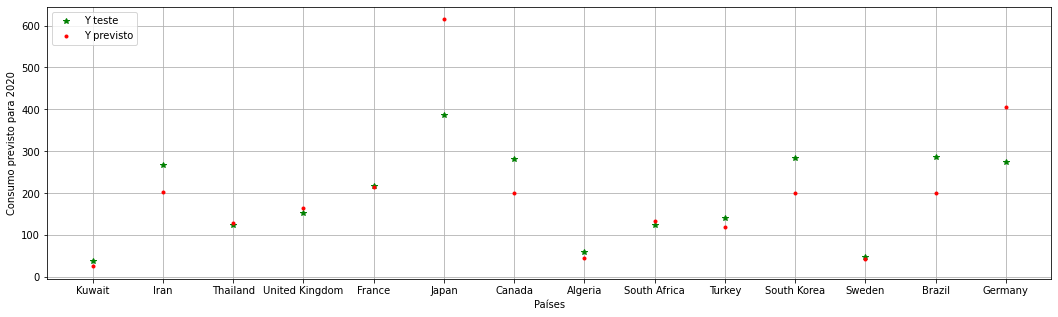

K Neighbors:
0.54
R2:(0.5368144969722564,)
Mean Absolute Error:(53.31428571428571,)
Mean Squared Error:(5014.011428571428,)
Max Error:120.19999999999999
Ypred:[ 29.  176.2 118.8 141.2 161.6 430.4 161.6  44.8 118.8 111.8 165.8  39.
 165.8 161.6]



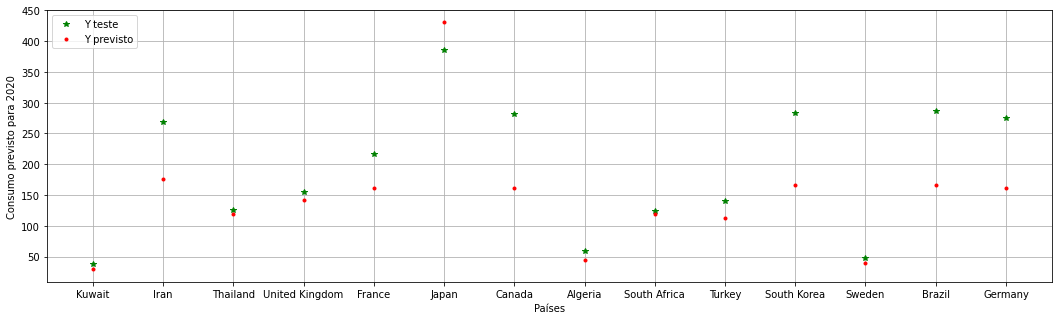

Linearr Rregression:
0.96
R2:(0.9621750669568567,)
Mean Absolute Error:(16.912834162016342,)
Mean Squared Error:(409.45721600425253,)
Max Error:36.188657142933664
Ypred:[ 25.1664487  247.87632998 122.09230573 134.46835215 237.10151301
 360.73164803 285.64398     54.08916347 155.5712637  153.83277877
 296.54251877  46.77132854 322.18865714 242.90545654]



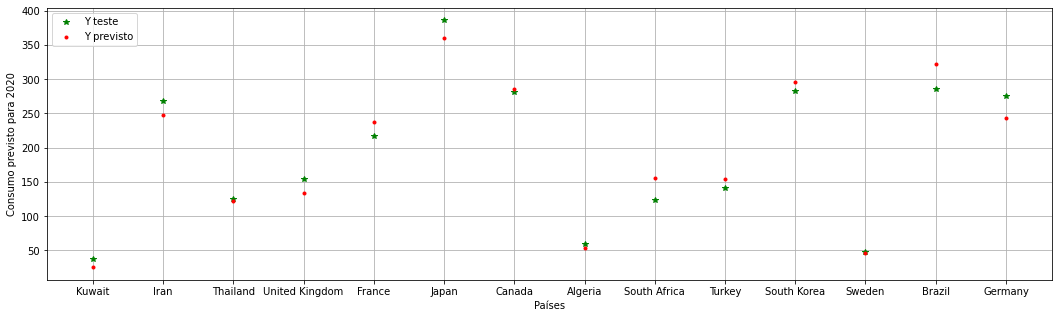

SVM:
-0.95
R2:(-0.9529059629893704,)
Mean Absolute Error:(119.67940205033366,)
Mean Squared Error:(21140.326615031136,)
Max Error:293.989140758516
Ypred:[87.74685464 88.96721691 88.26791    89.17575952 89.69491924 92.01085924
 89.80671624 87.83136846 88.41609154 88.23354853 89.4029767  87.88594226
 89.49163067 90.48490805]



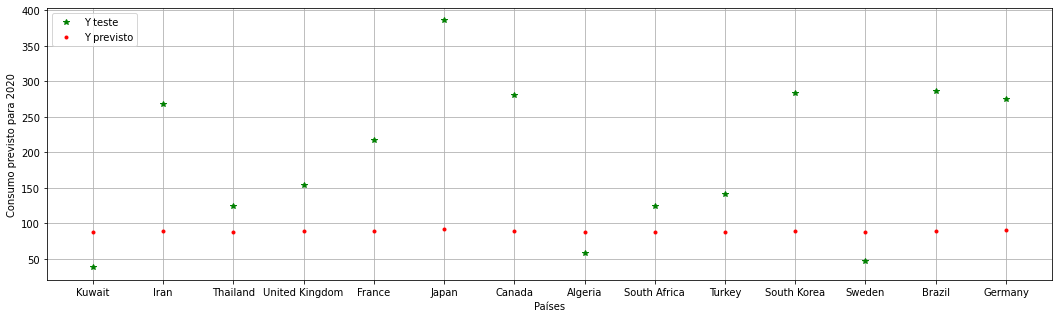

In [ ]:
for model_name2, model_obj2 in models.items():
    model_obj2.fit(xcy_train,ycy_train)
    ycypred=model_obj2.predict(xcy_test)
    score2 = model_obj2.score(xcy_test,ycy_test) #r2_score

    r2s= r2_score(ycy_test,ycypred),
    mae= mean_absolute_error(ycy_test,ycypred),
    mse= mean_squared_error(ycy_test,ycypred),
    me= max_error(ycy_test,ycypred)

    print(f"{model_name2}:\n{score2:.02f}\nR2:{r2s}\nMean Absolute Error:{mae}\nMean Squared Error:{mse}\nMax Error:{me}\nYpred:{ycypred}\n"),
    plt.figure(figsize=(18, 5))
    plt.plot(ycy_test, 'g*', label='Y teste')
    plt.plot(ycypred, 'r.', label='Y previsto')
    plt.legend(loc=2)
    plt.xlabel('Países')
    plt.ylabel('Consumo previsto para 2020')
    plt.grid(True)
    plt.show()

In [ ]:
ycy_test

Kuwait             38.0
Iran              268.0
Thailand          125.0
United Kingdom    154.0
France            217.0
Japan             386.0
Canada            281.0
Algeria            59.0
South Africa      124.0
Turkey            141.0
South Korea       283.0
Sweden             47.0
Brazil            286.0
Germany           275.0
Name: 30, dtype: float64

Importando e Tratando Dados - TOP20

In [ ]:
top20 = pd.read_csv('/content/top20CountriesPowerGeneration.csv')
top20

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


In [ ]:
yt20=top20.iloc[:,5]
yt20

0     1819.9400
1      758.6190
2      466.3500
3      424.0900
4      262.6500
5      227.1800
6      188.3300
7      187.3490
8      114.8200
9      113.9900
10     110.0700
11     100.5400
12      96.6200
13      56.0200
14      44.6200
15      41.6406
16      30.5401
17      25.3200
18      15.4500
19      12.4000
Name: Total (TWh), dtype: float64

In [ ]:
xt20=top20.iloc[:,1:5]
xt20

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1189.84,295.0200,79.43,0.1250
1,315.62,277.9100,58.95,18.9600
2,370.90,42.3700,52.25,0.0000
3,383.48,29.6500,7.12,0.0000
4,141.80,51.0600,43.76,0.0000
5,24.17,111.5900,45.10,0.1600
6,187.13,0.1400,0.08,0.4300
7,90.67,7.6300,19.01,2.4400
8,70.13,28.5000,5.87,0.1300
9,50.92,17.4900,16.85,6.0800


In [ ]:
xt20_train, xt20_test, yt20_train, yt20_test=train_test_split(xt20,yt20,test_size=0.30,random_state=13)

In [ ]:
models={
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K Neighbors": KNeighborsRegressor(),
    "Linearr Rregression": LinearRegression(),
    "SVM": SVR(),
}

Decision Tree:
0.18
R2:(0.17860871780744658,)
Mean Absolute Error:(299.1031666666667,)
Mean Squared Error(321970.8528101667,)
Max Error1353.5900000000001
Ypred:[113.99 113.99 466.35 466.35 113.99 110.07]



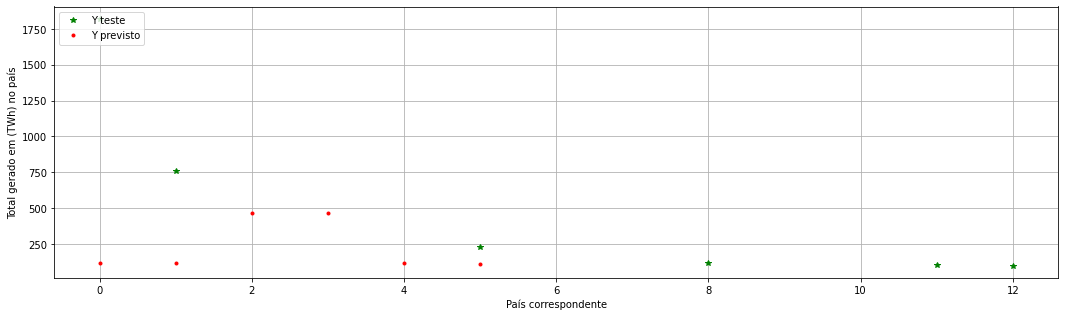

Random Forest:
0.07
R2:(0.0689674924484881,)
Mean Absolute Error:(317.7728875,)
Mean Squared Error(364948.27367802063,)
Max Error1431.11362
Ypred:[104.653805  87.889614 388.82638  390.15195  136.388568 154.536104]



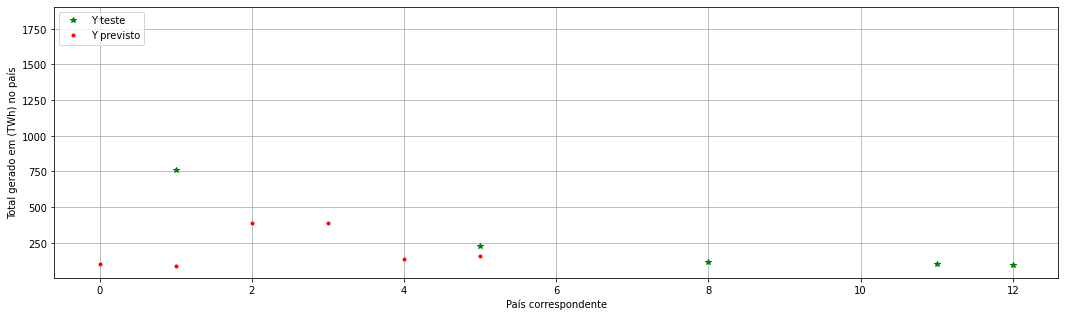

K Neighbors:
-0.07
R2:(-0.07318796336668498,)
Mean Absolute Error:(364.94759,)
Mean Squared Error(420670.6977318222,)
Max Error1514.1862
Ypred:[ 68.03     88.72392 305.7538  305.7538   88.72392  71.04802]



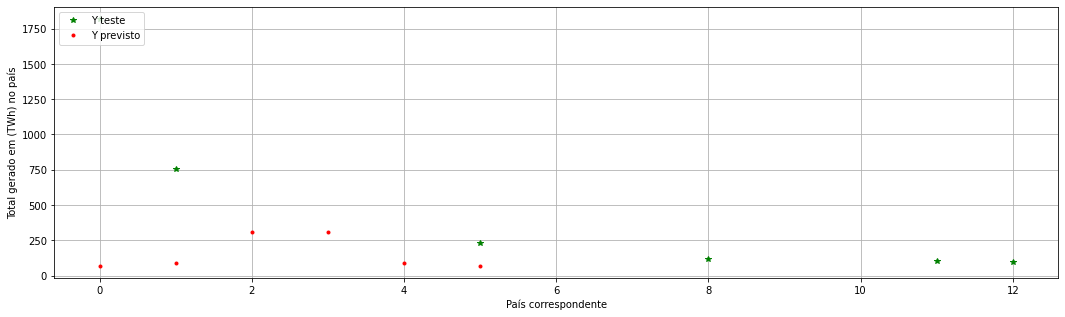

Linearr Rregression:
0.96
R2:(0.9557271754278004,)
Mean Absolute Error:(77.07303868401645,)
Mean Squared Error(17354.164078508467,)
Max Error302.78745796605176
Ypred:[  91.34830822   98.35895349 1517.15254203  654.19033756  108.0205379
  189.68799568]



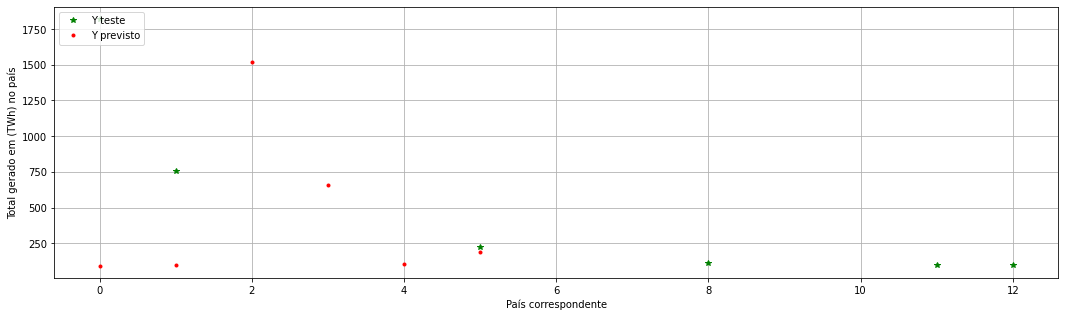

SVM:
-0.48
R2:(-0.47965226129085825,)
Mean Absolute Error:(434.87994255954135,)
Mean Squared Error(579997.5124627982,)
Max Error1733.8495962061384
Ypred:[83.46305179 83.66273257 86.09040379 86.24468041 84.14690481 84.83157126]



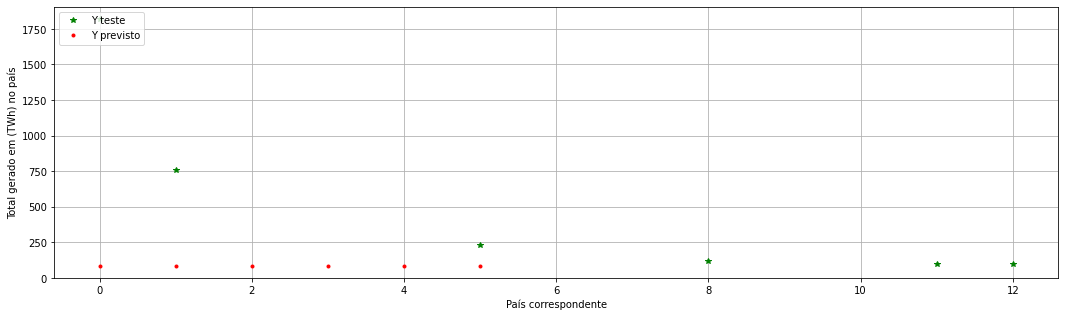

In [ ]:
for model_name3, model_obj3 in models.items():
    model_obj3.fit(xt20_train,yt20_train)
    yt20pred=model_obj3.predict(xt20_test)
    yp3=yt20pred
    score3 = model_obj3.score(xt20_test,yt20_test) #r2_score
    
    r2s= r2_score(yt20_test,yt20pred),
    mae= mean_absolute_error(yt20_test,yt20pred),
    mse= mean_squared_error(yt20_test,yt20pred),
    me= max_error(yt20_test,yt20pred)

    print(f"{model_name3}:\n{score3:.02f}\nR2:{r2s}\nMean Absolute Error:{mae}\nMean Squared Error{mse}\nMax Error{me}\nYpred:{yt20pred}\n"),
    plt.figure(figsize=(18, 5))
    plt.plot(yt20_test, 'g*', label="Y teste")
    plt.plot(yt20pred, 'r.',label="Y previsto")
    plt.legend(loc=2)
    plt.xlabel('País correspondente')
    plt.ylabel('Total gerado em (TWh) no país')
    plt.grid(True)
    plt.show()


In [ ]:
yt20_test

11     100.540
12      96.620
0     1819.940
1      758.619
8      114.820
5      227.180
Name: Total (TWh), dtype: float64